# Baron Pancreas Human

In [1]:
%pylab inline

import warnings
warnings.filterwarnings("ignore")
from SCCAF import *

Populating the interactive namespace from numpy and matplotlib


In [2]:
ad = sc.read("../write/Baron_Human_reg.h5")

In [3]:
sc.pp.neighbors(ad, n_pcs=25)
sc.tl.louvain(ad, resolution=1.5, key_added = 'louvain_r1.5')

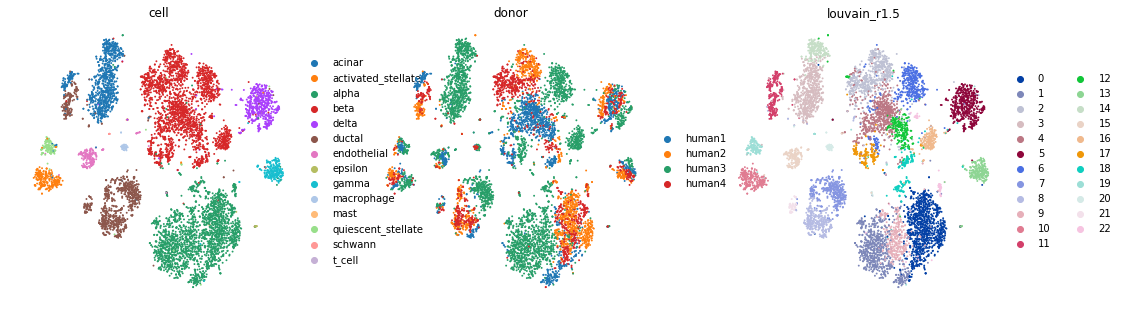

In [4]:
figsize(5,5)
sc.pl.tsne(ad, color=['cell','donor','louvain_r1.5'], frameon=False)

## SCCAF assessment
> use self-projection to test the global accuracy of a clustering (the human expert clustering). 
We find the discrimination between the human annotated cell types is very clear and the accuracy is up to 96%. It shows an almost-perfect clustering.

Mean CV accuracy: 0.9653
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9633


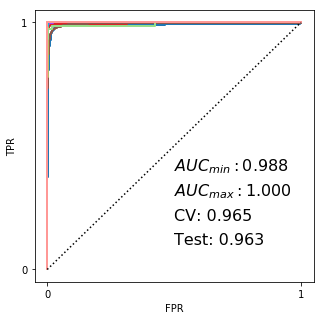

In [5]:
y_prob, y_pred, y_test, clf, cvsm, acc = SCCAF_assessment(ad.X, ad.obs['cell'],n=100)
aucs = plot_roc(y_prob, y_test, clf, cvsm=cvsm, acc=acc)
plt.show()

## SCCAF recover
When the data annotation is unknown and we aim to identify the best clustering solution. 
We may start with a `over-clustering` and optimize the clustering by merging the clusters that cannot be discriminated by a machine learning model. 
(Here we use `logistic regression`, which uses a linear model, for the machine learning.) And we also constrain the optimization with a `under-clustering`.

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`).

We assign the optimization name (the `prefix` parameter) as `L1`, and the initial state of the optimization is named as `L1_Round0` kept in the `anndata.obs` slot.
Each Round of the optimization will increase the index, from `L1_Round1`, `L1_Round2` to `L1_Round10` ....

In [6]:
ad.obs['L1_Round0'] = ad.obs['louvain_r1.5']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.8818
Accuracy on the training set: 0.9754
Accuracy on the hold-out set: 0.8771


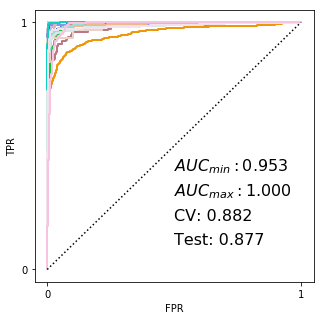

... storing 'L1_Round0_self-projection' as categorical


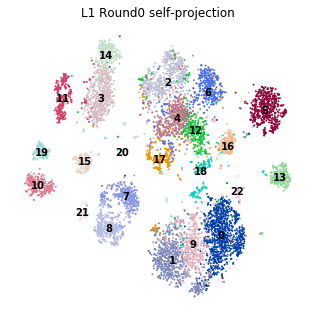

Accuracy on the training set: 0.9749
Accuracy on the hold-out set: 0.8799
Accuracy on the training set: 0.9778
Accuracy on the hold-out set: 0.8732
Max R1mat: 0.265487
Max R2mat: 0.013350


<Figure size 360x360 with 0 Axes>

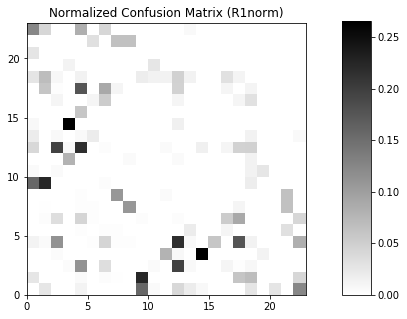

<Figure size 360x360 with 0 Axes>

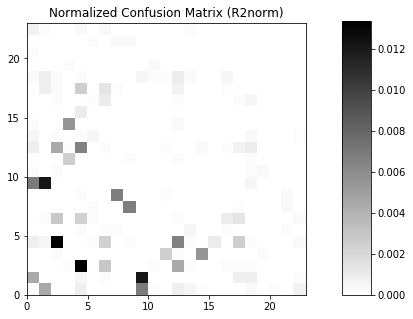

IGRAPH U-W- 23 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.265487
m2: 0.013350
Accuracy: 0.873205
start_iter: 0
R1norm_cutoff: 0.255487
R2norm_cutoff: 0.012350
Accuracy: 0.873205
Round1 ...
Mean CV accuracy: 0.8880
Accuracy on the training set: 0.9807
Accuracy on the hold-out set: 0.8634


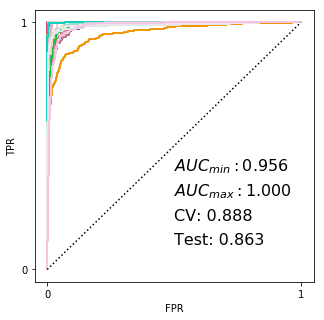

... storing 'L1_Round0_self-projection' as categorical


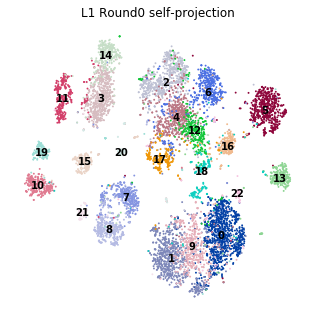

Accuracy on the training set: 0.9749
Accuracy on the hold-out set: 0.8774
Accuracy on the training set: 0.9797
Accuracy on the hold-out set: 0.8701
Max R1mat: 0.286957
Max R2mat: 0.013570


<Figure size 360x360 with 0 Axes>

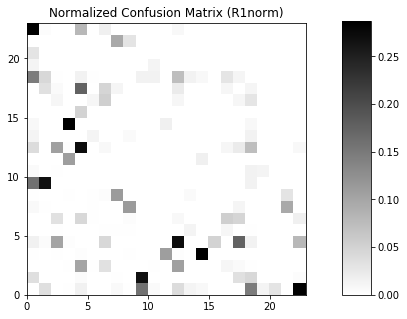

<Figure size 360x360 with 0 Axes>

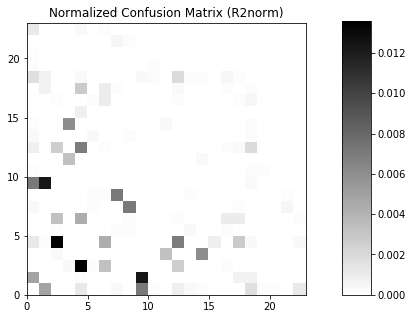

... storing 'L1_Round1' as categorical


IGRAPH U-W- 23 8 --
+ attr: weight (e)
+ edges:
0--22 1--9 3--14 4--12 1--9 4--12 3--14 0--22


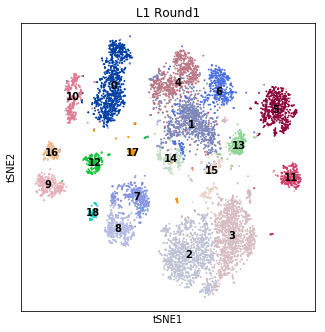

Round2 ...
Mean CV accuracy: 0.9167
Accuracy on the training set: 0.9856
Accuracy on the hold-out set: 0.8977


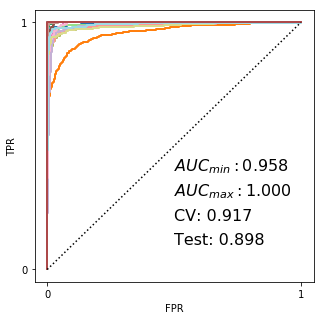

... storing 'L1_Round1_self-projection' as categorical


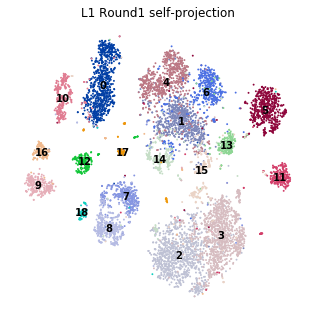

Accuracy on the training set: 0.9856
Accuracy on the hold-out set: 0.8943
Accuracy on the training set: 0.9868
Accuracy on the hold-out set: 0.8891
Max R1mat: 0.369048
Max R2mat: 0.018722


<Figure size 360x360 with 0 Axes>

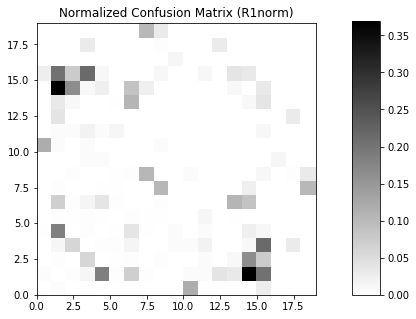

<Figure size 360x360 with 0 Axes>

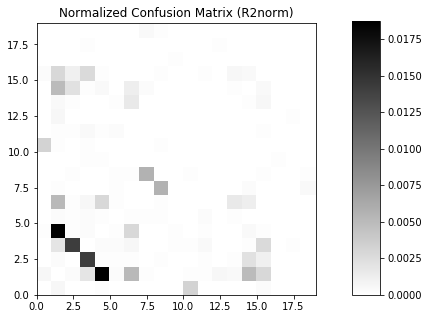

... storing 'L1_Round2' as categorical


IGRAPH U-W- 19 2 --
+ attr: weight (e)
+ edges:
1--14 1--14


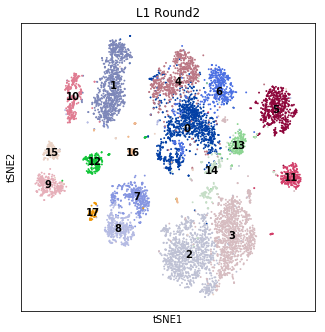

Round3 ...
Mean CV accuracy: 0.8984
Accuracy on the training set: 0.9830
Accuracy on the hold-out set: 0.8986


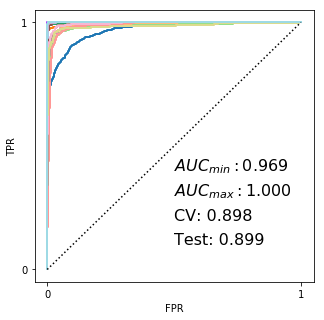

... storing 'L1_Round2_self-projection' as categorical


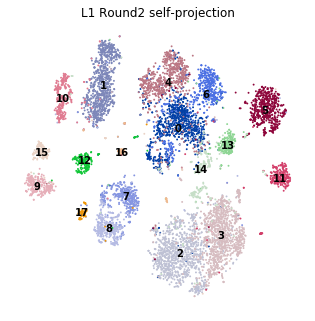

Accuracy on the training set: 0.9848
Accuracy on the hold-out set: 0.8871
Accuracy on the training set: 0.9897
Accuracy on the hold-out set: 0.8906
Max R1mat: 0.358974
Max R2mat: 0.021864


<Figure size 360x360 with 0 Axes>

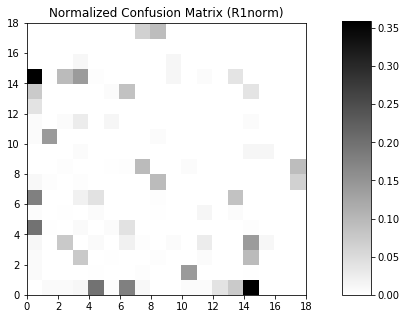

<Figure size 360x360 with 0 Axes>

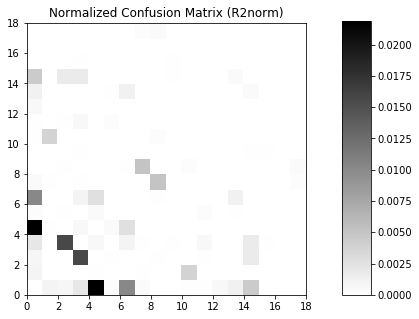

... storing 'L1_Round3' as categorical


IGRAPH U-W- 18 2 --
+ attr: weight (e)
+ edges:
0--14 0--14


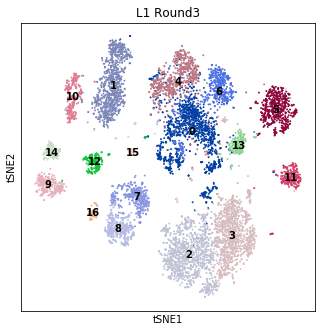

Round4 ...
Mean CV accuracy: 0.9091
Accuracy on the training set: 0.9819
Accuracy on the hold-out set: 0.8810


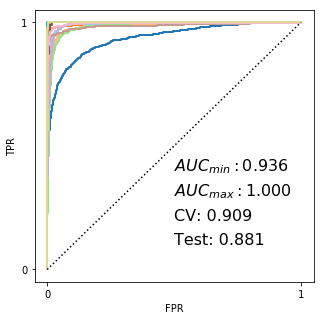

... storing 'L1_Round3_self-projection' as categorical


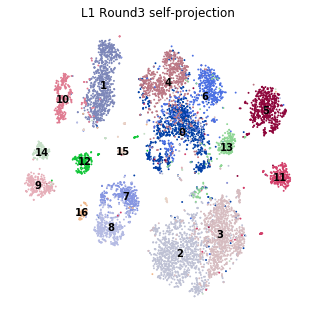

Accuracy on the training set: 0.9865
Accuracy on the hold-out set: 0.8824
Accuracy on the training set: 0.9800
Accuracy on the hold-out set: 0.8855
Max R1mat: 0.448980
Max R2mat: 0.020951


<Figure size 360x360 with 0 Axes>

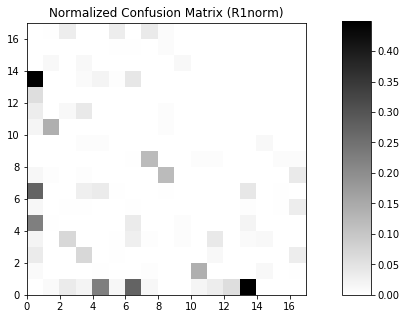

<Figure size 360x360 with 0 Axes>

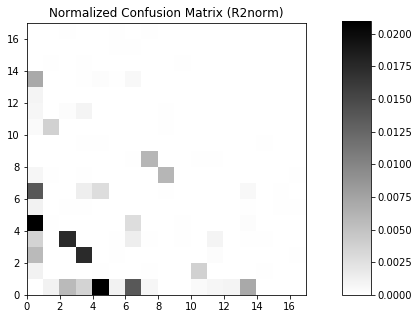

... storing 'L1_Round4' as categorical


IGRAPH U-W- 17 4 --
+ attr: weight (e)
+ edges:
0--6 0--13 0--6 0--13


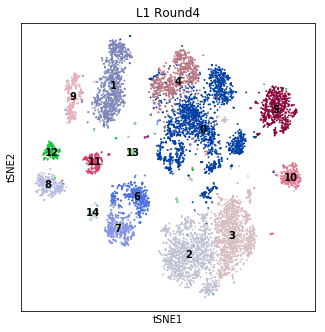

Round5 ...
Mean CV accuracy: 0.9334
Accuracy on the training set: 0.9948
Accuracy on the hold-out set: 0.9057


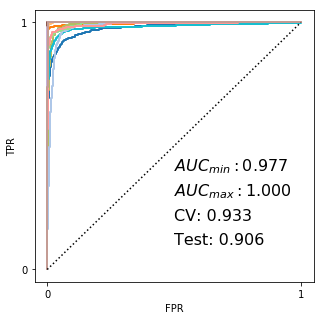

... storing 'L1_Round4_self-projection' as categorical


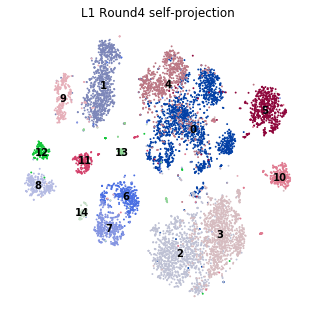

Accuracy on the training set: 0.9933
Accuracy on the hold-out set: 0.9090
Accuracy on the training set: 0.9882
Accuracy on the hold-out set: 0.9065
Max R1mat: 0.367647
Max R2mat: 0.032555


<Figure size 360x360 with 0 Axes>

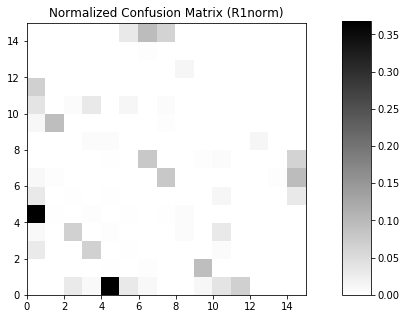

<Figure size 360x360 with 0 Axes>

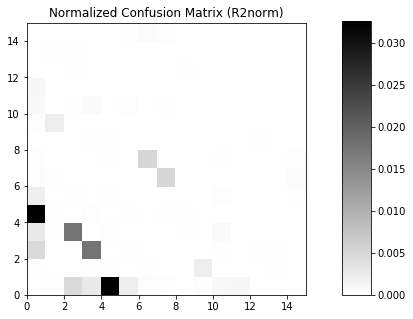

... storing 'L1_Round5' as categorical


IGRAPH U-W- 15 2 --
+ attr: weight (e)
+ edges:
0--4 0--4


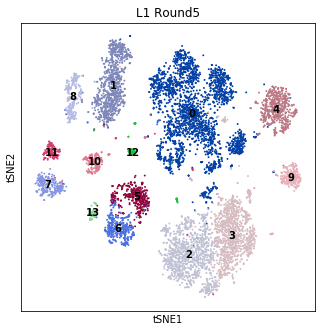

Round6 ...
Mean CV accuracy: 0.9496
Accuracy on the training set: 0.9992
Accuracy on the hold-out set: 0.9408


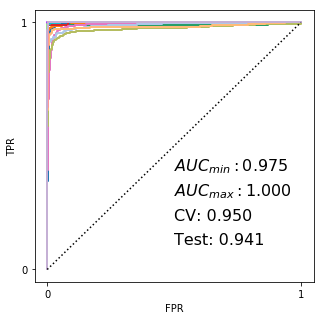

... storing 'L1_Round5_self-projection' as categorical


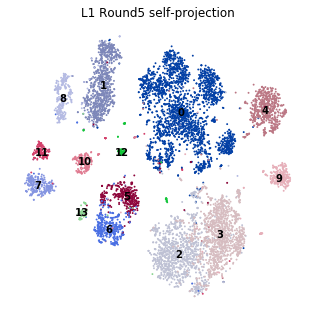

Accuracy on the training set: 0.9952
Accuracy on the hold-out set: 0.9452
Accuracy on the training set: 0.9984
Accuracy on the hold-out set: 0.9433
Max R1mat: 0.124260
Max R2mat: 0.017673


<Figure size 360x360 with 0 Axes>

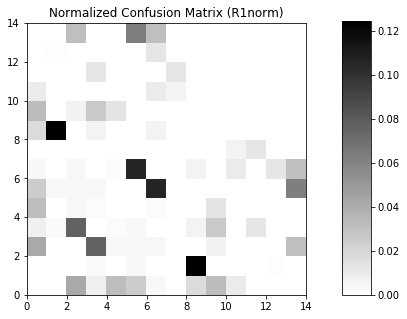

<Figure size 360x360 with 0 Axes>

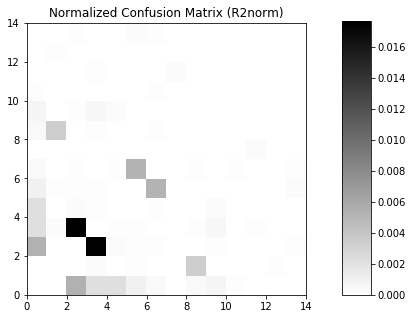

IGRAPH U-W- 14 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.124260
m2: 0.017673
Accuracy: 0.940846
start_iter: 5
R1norm_cutoff: 0.114260
R2norm_cutoff: 0.016673
Accuracy: 0.940846
Round6 ...
Mean CV accuracy: 0.9465
Accuracy on the training set: 0.9992
Accuracy on the hold-out set: 0.9447


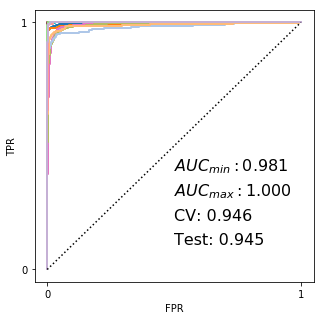

... storing 'L1_Round5_self-projection' as categorical


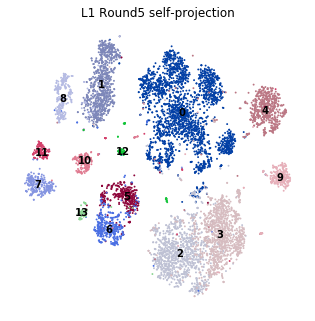

Accuracy on the training set: 0.9960
Accuracy on the hold-out set: 0.9467
Accuracy on the training set: 0.9944
Accuracy on the hold-out set: 0.9439
Max R1mat: 0.107143
Max R2mat: 0.016794


<Figure size 360x360 with 0 Axes>

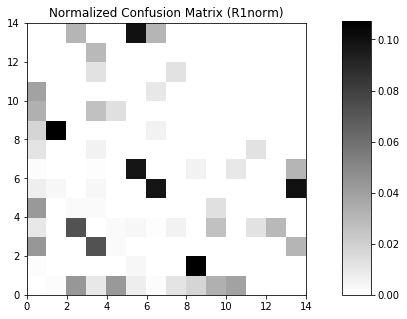

<Figure size 360x360 with 0 Axes>

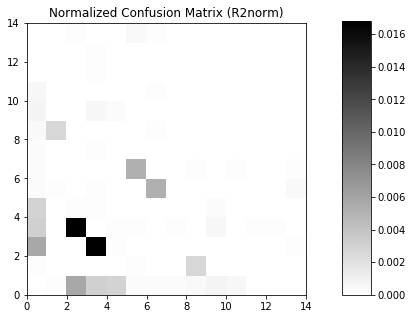

IGRAPH U-W- 14 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.107143
m2: 0.016794
Accuracy: 0.943869
start_iter: 5
R1norm_cutoff: 0.097143
R2norm_cutoff: 0.015794
Accuracy: 0.943869
Round6 ...
Mean CV accuracy: 0.9592
Accuracy on the training set: 0.9936
Accuracy on the hold-out set: 0.9364


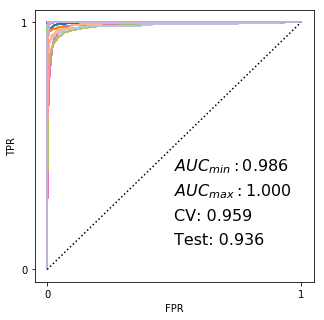

... storing 'L1_Round5_self-projection' as categorical


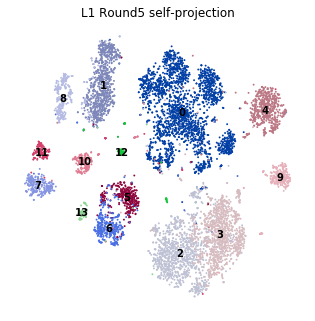

Accuracy on the training set: 0.9976
Accuracy on the hold-out set: 0.9449
Accuracy on the training set: 0.9968
Accuracy on the hold-out set: 0.9421
Max R1mat: 0.126531
Max R2mat: 0.015932


<Figure size 360x360 with 0 Axes>

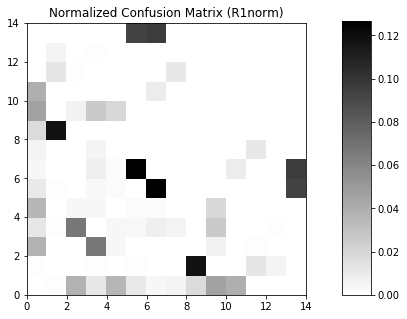

<Figure size 360x360 with 0 Axes>

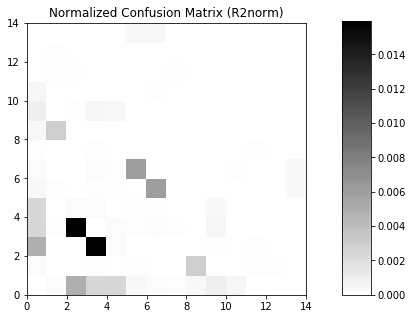

... storing 'L1_Round6' as categorical


IGRAPH U-W- 14 4 --
+ attr: weight (e)
+ edges:
1--8 5--6 5--6 1--8


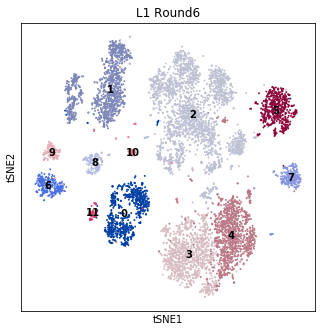

Round7 ...
Mean CV accuracy: 0.9610
Accuracy on the training set: 0.9962
Accuracy on the hold-out set: 0.9580


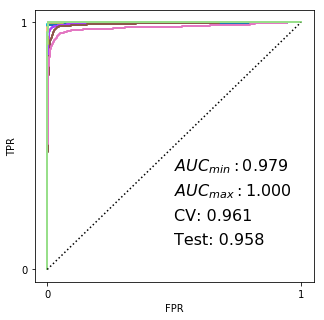

... storing 'L1_Round6_self-projection' as categorical


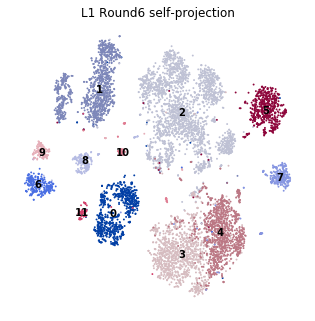

Accuracy on the training set: 0.9962
Accuracy on the hold-out set: 0.9564
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9569
Max R1mat: 0.129032
Max R2mat: 0.014394


<Figure size 360x360 with 0 Axes>

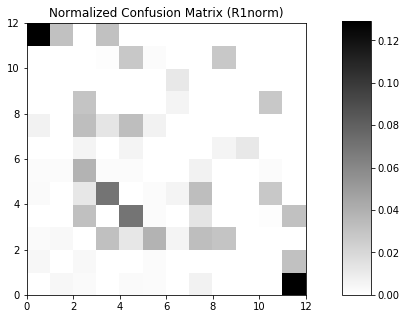

<Figure size 360x360 with 0 Axes>

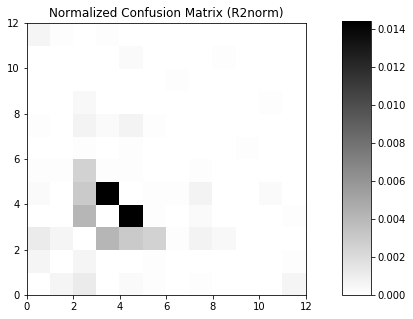

... storing 'L1_Round7' as categorical


IGRAPH U-W- 12 2 --
+ attr: weight (e)
+ edges:
0--11 0--11


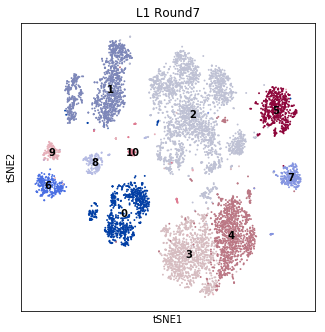

Round8 ...
Mean CV accuracy: 0.9666
Accuracy on the training set: 0.9971
Accuracy on the hold-out set: 0.9582


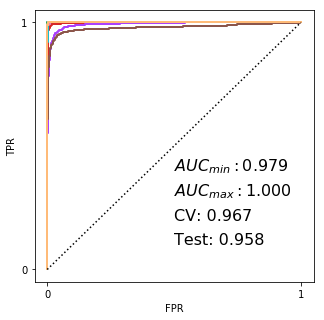

... storing 'L1_Round7_self-projection' as categorical


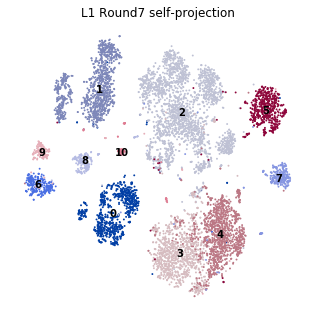

Accuracy on the training set: 0.9980
Accuracy on the hold-out set: 0.9609
Accuracy on the training set: 0.9980
Accuracy on the hold-out set: 0.9546
Max R1mat: 0.075908
Max R2mat: 0.016549


<Figure size 360x360 with 0 Axes>

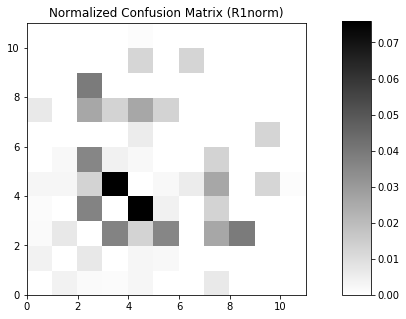

<Figure size 360x360 with 0 Axes>

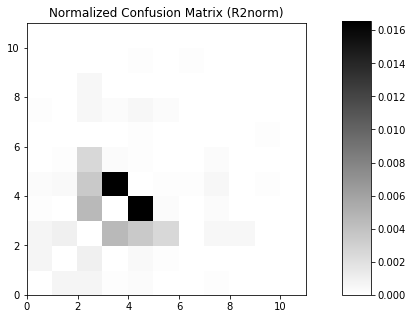

IGRAPH U-W- 11 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.075908
m2: 0.016549
Accuracy: 0.954596
start_iter: 7
R1norm_cutoff: 0.065908
R2norm_cutoff: 0.015549
Accuracy: 0.954596
Round8 ...
Mean CV accuracy: 0.9627
Accuracy on the training set: 0.9971
Accuracy on the hold-out set: 0.9614


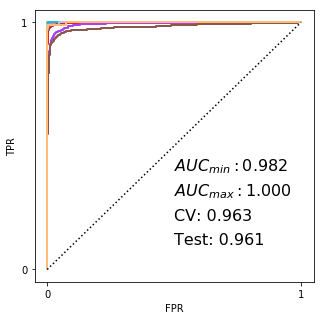

... storing 'L1_Round7_self-projection' as categorical


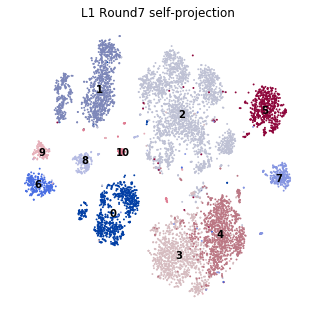

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9570
Accuracy on the training set: 0.9980
Accuracy on the hold-out set: 0.9599
Max R1mat: 0.075492
Max R2mat: 0.014213


<Figure size 360x360 with 0 Axes>

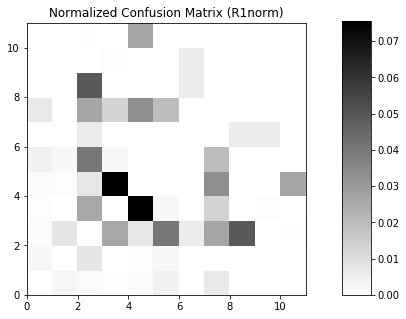

<Figure size 360x360 with 0 Axes>

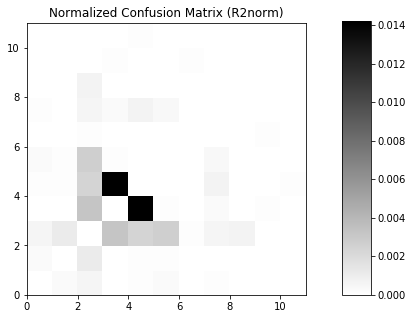

... storing 'L1_Round8' as categorical


IGRAPH U-W- 11 2 --
+ attr: weight (e)
+ edges:
3--4 3--4


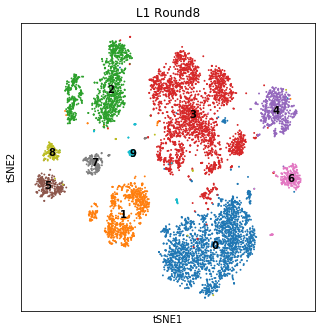

Round9 ...
Mean CV accuracy: 0.9793
Accuracy on the training set: 0.9989
Accuracy on the hold-out set: 0.9804


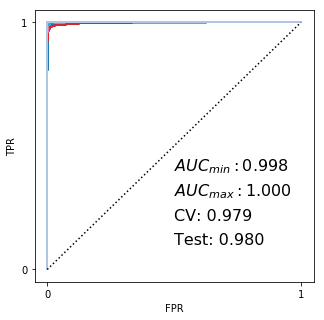

... storing 'L1_Round8_self-projection' as categorical


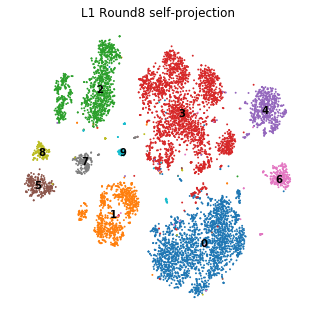

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9799
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9809
Max R1mat: 0.031983
Max R2mat: 0.006234
Converge SCCAF_optimize min_acc!
m1: 0.031983
m2: 0.006234
Accuracy: 0.979945


In [9]:
SCCAF_optimize_all(min_acc=0.976, ad=ad, use='pca', basis ='tsne')

In [10]:
ad.write("../write/Baron_Human_reg.h5")

In [14]:
ad.obs['L1_result'] = \
ad.obs['L1_result'].cat.reorder_categories(['2', '5', '0', '3', '4',\
                                            '1', '8', '7','6','9'])

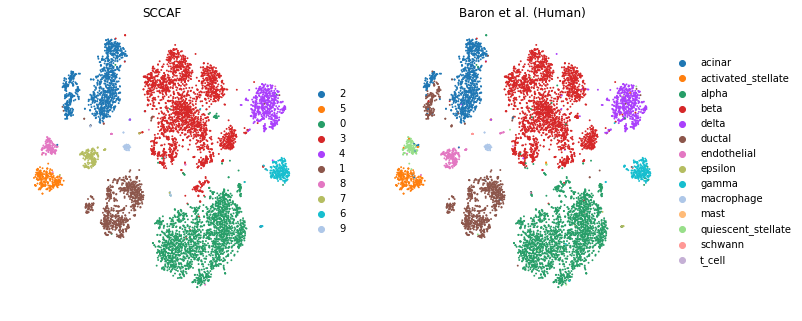

In [15]:
sc.pl.tsne(ad, color=['L1_result','cell',],frameon=False, title=['SCCAF','Baron et al. (Human)'])

## SCCAF recover with constraints

In this example, we start with louvain clustering resolution 1.5 (`louvain_r1.5`) and constrain the optimization with louvain clustering resolution 0.2 (`louvain_r0.2`).

In [18]:
sc.tl.louvain(ad, resolution=0.2, key_added='louvain_r0.2')

In [22]:
ad.obs['L2_Round0'] = ad.obs['L1_Round0']

start_iter: 0
R1norm_cutoff: 0.500000
R2norm_cutoff: 0.050000
Accuracy: 0.000000
Round1 ...
Mean CV accuracy: 0.8788
Accuracy on the training set: 0.9763
Accuracy on the hold-out set: 0.8740


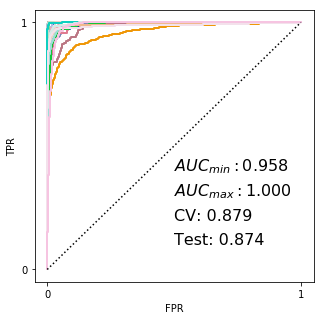

... storing 'L2_Round0_self-projection' as categorical


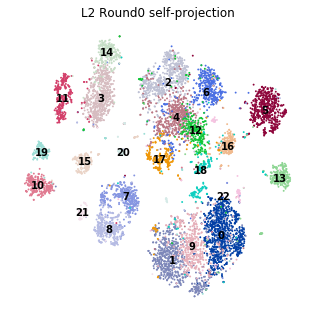

Accuracy on the training set: 0.9759
Accuracy on the hold-out set: 0.8701
Accuracy on the training set: 0.9763
Accuracy on the hold-out set: 0.8688
Max R1mat: 0.305085
Max R2mat: 0.013289


<Figure size 360x360 with 0 Axes>

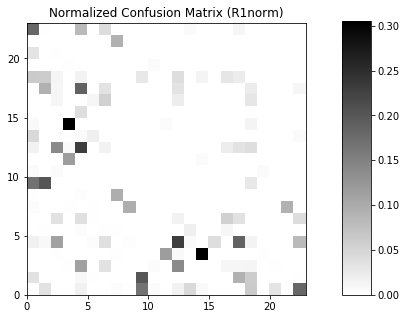

<Figure size 360x360 with 0 Axes>

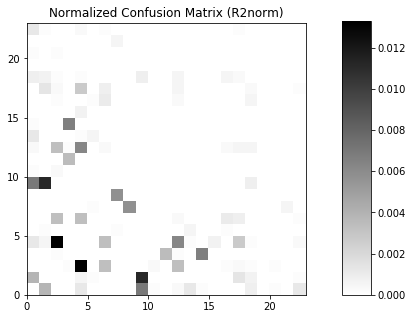

IGRAPH U-W- 23 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.305085
m2: 0.013289
Accuracy: 0.868799
start_iter: 0
R1norm_cutoff: 0.295085
R2norm_cutoff: 0.012289
Accuracy: 0.868799
Round1 ...
Mean CV accuracy: 0.8860
Accuracy on the training set: 0.9802
Accuracy on the hold-out set: 0.8644


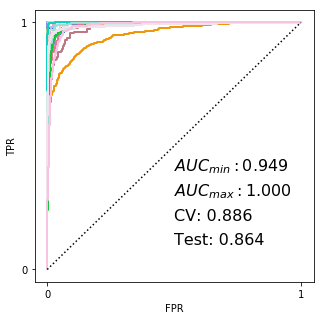

... storing 'L2_Round0_self-projection' as categorical


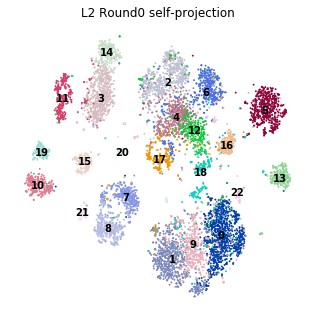

Accuracy on the training set: 0.9773
Accuracy on the hold-out set: 0.8730
Accuracy on the training set: 0.9763
Accuracy on the hold-out set: 0.8740
Max R1mat: 0.317829
Max R2mat: 0.013394


<Figure size 360x360 with 0 Axes>

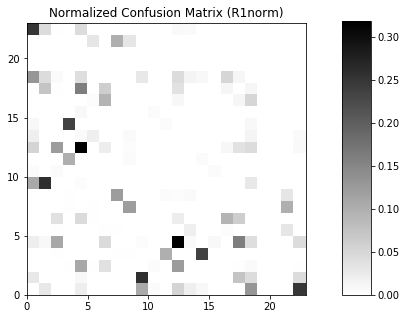

<Figure size 360x360 with 0 Axes>

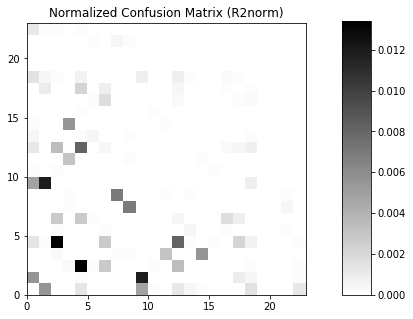

... storing 'L2_Round1' as categorical


IGRAPH U-W- 23 2 --
+ attr: weight (e)
+ edges:
4--12 4--12


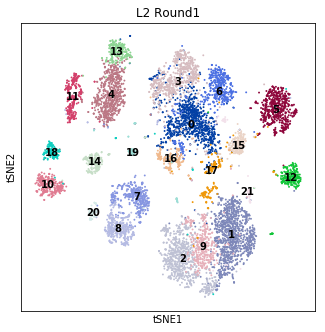

Round2 ...
Mean CV accuracy: 0.8986
Accuracy on the training set: 0.9817
Accuracy on the hold-out set: 0.8770


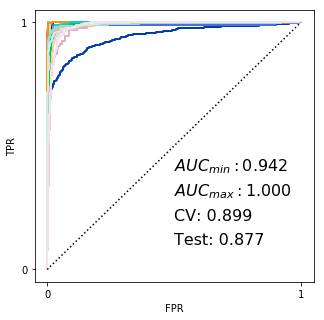

... storing 'L2_Round1_self-projection' as categorical


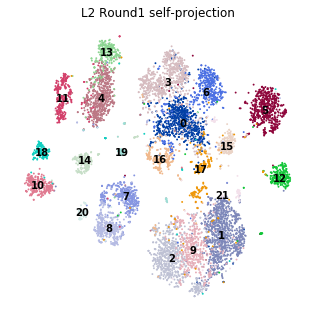

Accuracy on the training set: 0.9827
Accuracy on the hold-out set: 0.8748
Accuracy on the training set: 0.9843
Accuracy on the hold-out set: 0.8698
Max R1mat: 0.357143
Max R2mat: 0.023072


<Figure size 360x360 with 0 Axes>

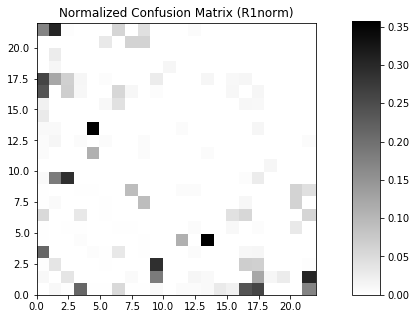

<Figure size 360x360 with 0 Axes>

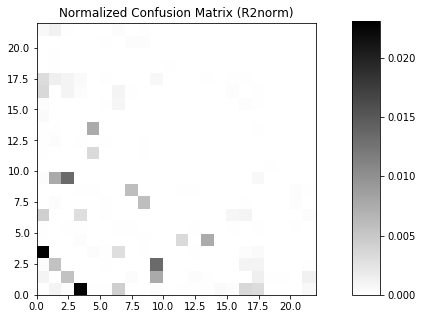

... storing 'L2_Round2' as categorical


IGRAPH U-W- 22 4 --
+ attr: weight (e)
+ edges:
1--21 4--13 4--13 1--21


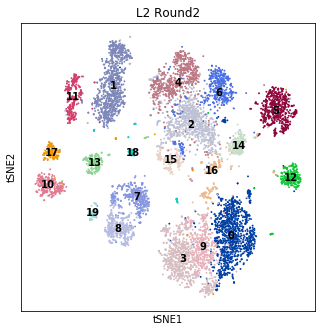

Round3 ...
Mean CV accuracy: 0.9017
Accuracy on the training set: 0.9799
Accuracy on the hold-out set: 0.8876


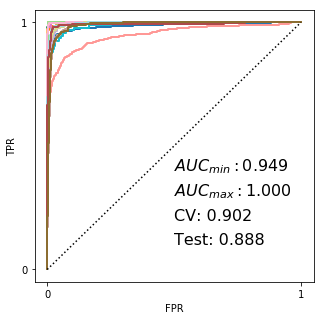

... storing 'L2_Round2_self-projection' as categorical


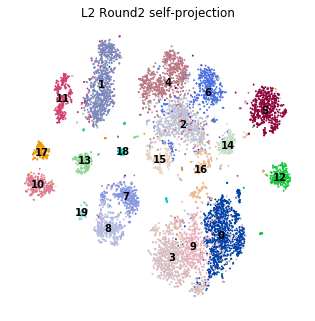

Accuracy on the training set: 0.9875
Accuracy on the hold-out set: 0.8816
Accuracy on the training set: 0.9810
Accuracy on the hold-out set: 0.8811
Max R1mat: 0.265060
Max R2mat: 0.020202


<Figure size 360x360 with 0 Axes>

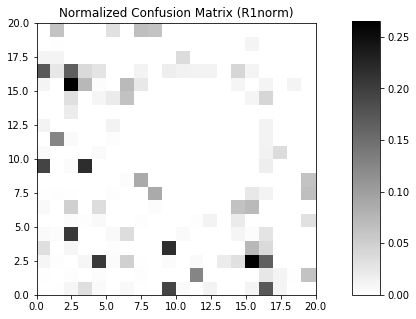

<Figure size 360x360 with 0 Axes>

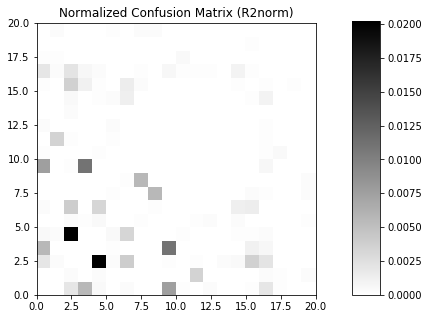

IGRAPH U-W- 20 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.265060
m2: 0.020202
Accuracy: 0.881113
start_iter: 2
R1norm_cutoff: 0.255060
R2norm_cutoff: 0.019202
Accuracy: 0.881113
Round3 ...
Mean CV accuracy: 0.9109
Accuracy on the training set: 0.9793
Accuracy on the hold-out set: 0.8788


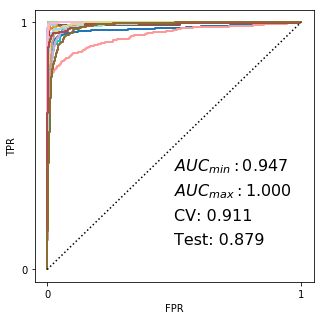

... storing 'L2_Round2_self-projection' as categorical


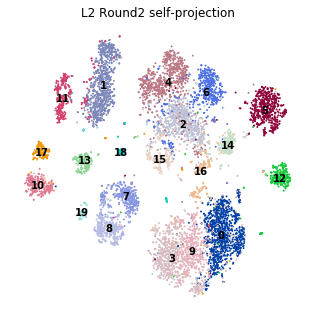

Accuracy on the training set: 0.9799
Accuracy on the hold-out set: 0.8877
Accuracy on the training set: 0.9804
Accuracy on the hold-out set: 0.8865
Max R1mat: 0.287356
Max R2mat: 0.016929


<Figure size 360x360 with 0 Axes>

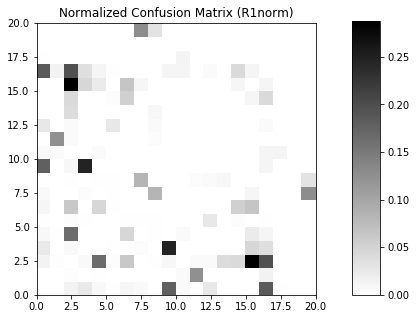

<Figure size 360x360 with 0 Axes>

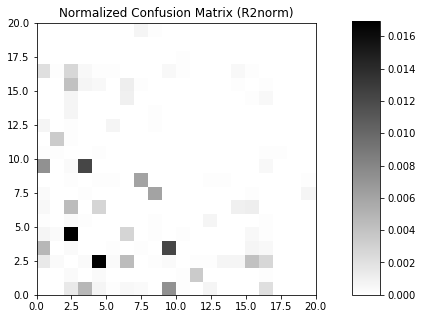

... storing 'L2_Round3' as categorical


IGRAPH U-W- 20 2 --
+ attr: weight (e)
+ edges:
2--15 2--15


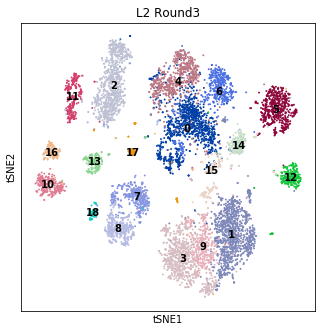

Round4 ...
Mean CV accuracy: 0.9140
Accuracy on the training set: 0.9862
Accuracy on the hold-out set: 0.8821


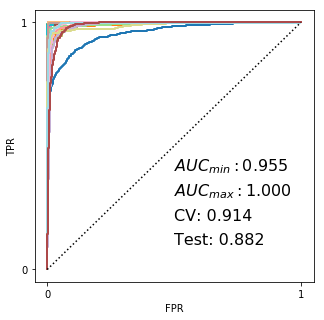

... storing 'L2_Round3_self-projection' as categorical


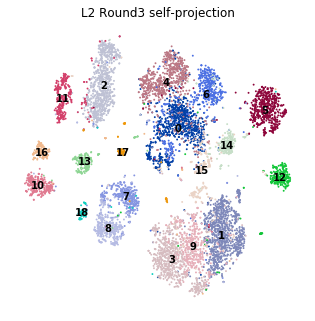

Accuracy on the training set: 0.9788
Accuracy on the hold-out set: 0.8881
Accuracy on the training set: 0.9897
Accuracy on the hold-out set: 0.8847
Max R1mat: 0.342466
Max R2mat: 0.022665


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

... storing 'L2_Round4' as categorical


IGRAPH U-W- 19 2 --
+ attr: weight (e)
+ edges:
0--15 0--15


Round5 ...
Mean CV accuracy: 0.9213
Accuracy on the training set: 0.9855
Accuracy on the hold-out set: 0.8740


... storing 'L2_Round4_self-projection' as categorical


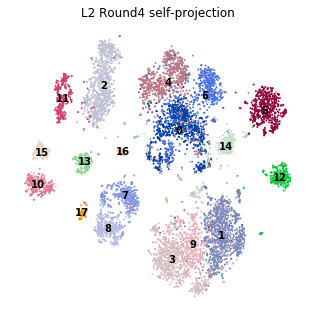

Accuracy on the training set: 0.9861
Accuracy on the hold-out set: 0.8739
Accuracy on the training set: 0.9873
Accuracy on the hold-out set: 0.8760
Max R1mat: 0.446809
Max R2mat: 0.023836


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

... storing 'L2_Round5' as categorical


IGRAPH U-W- 18 4 --
+ attr: weight (e)
+ edges:
0--4 0--14 0--4 0--14


Round6 ...
Mean CV accuracy: 0.9235
Accuracy on the training set: 0.9917
Accuracy on the hold-out set: 0.8954


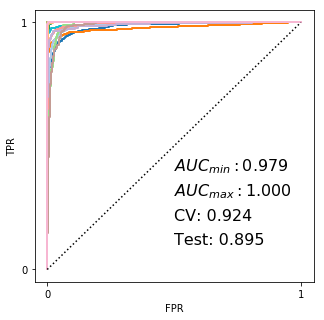

... storing 'L2_Round5_self-projection' as categorical


Accuracy on the training set: 0.9910
Accuracy on the hold-out set: 0.8897
Accuracy on the training set: 0.9910
Accuracy on the hold-out set: 0.8863
Max R1mat: 0.642857
Max R2mat: 0.032979


<Figure size 360x360 with 0 Axes>

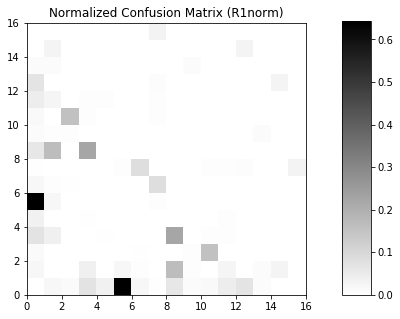

<Figure size 360x360 with 0 Axes>

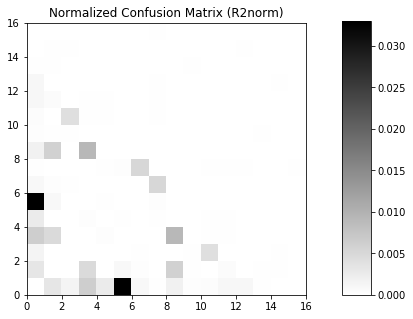

... storing 'L2_Round6' as categorical


IGRAPH U-W- 16 2 --
+ attr: weight (e)
+ edges:
0--5 0--5


Round7 ...
Mean CV accuracy: 0.9423
Accuracy on the training set: 0.9970
Accuracy on the hold-out set: 0.9312


... storing 'L2_Round6_self-projection' as categorical


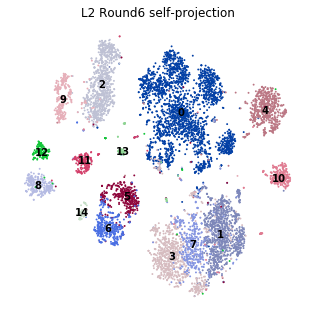

Accuracy on the training set: 0.9896
Accuracy on the hold-out set: 0.9318
Accuracy on the training set: 0.9919
Accuracy on the hold-out set: 0.9382
Max R1mat: 0.237113
Max R2mat: 0.010226


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

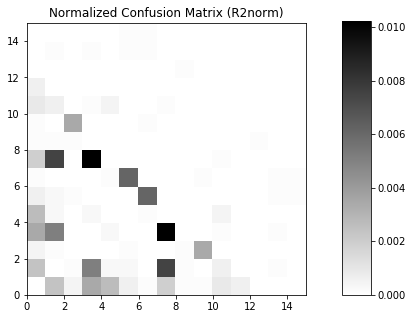

IGRAPH U-W- 15 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.237113
m2: 0.010226
Accuracy: 0.931221
start_iter: 6
R1norm_cutoff: 0.227113
R2norm_cutoff: 0.009226
Accuracy: 0.931221
Round7 ...
Mean CV accuracy: 0.9408
Accuracy on the training set: 0.9978
Accuracy on the hold-out set: 0.9324


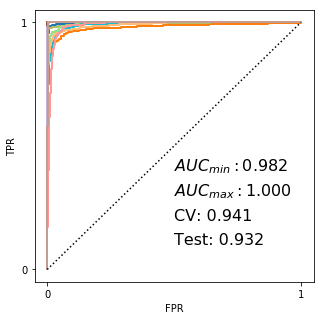

... storing 'L2_Round6_self-projection' as categorical


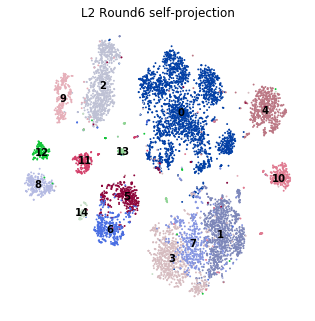

Accuracy on the training set: 0.9933
Accuracy on the hold-out set: 0.9356
Accuracy on the training set: 0.9948
Accuracy on the hold-out set: 0.9374
Max R1mat: 0.227723
Max R2mat: 0.010637


<Figure size 360x360 with 0 Axes>

<Figure size 360x360 with 0 Axes>

... storing 'L2_Round7' as categorical


IGRAPH U-W- 15 2 --
+ attr: weight (e)
+ edges:
3--7 3--7


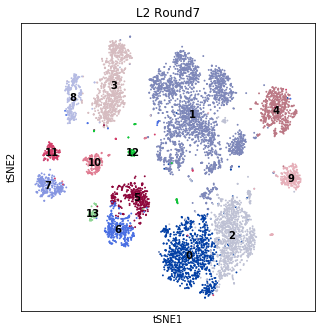

Round8 ...
Mean CV accuracy: 0.9488
Accuracy on the training set: 0.9960
Accuracy on the hold-out set: 0.9449


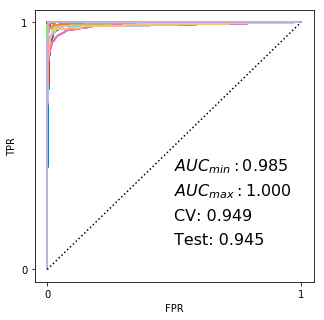

... storing 'L2_Round7_self-projection' as categorical


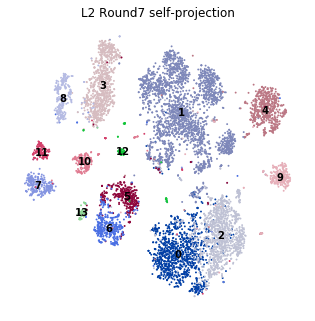

Accuracy on the training set: 0.9968
Accuracy on the hold-out set: 0.9450
Accuracy on the training set: 0.9976
Accuracy on the hold-out set: 0.9443
Max R1mat: 0.122449
Max R2mat: 0.018799


<Figure size 360x360 with 0 Axes>

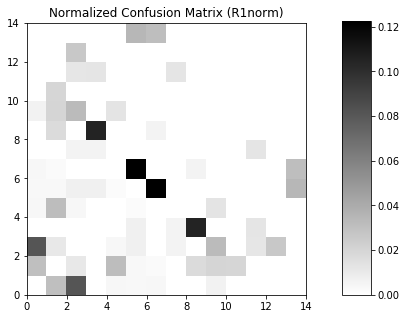

<Figure size 360x360 with 0 Axes>

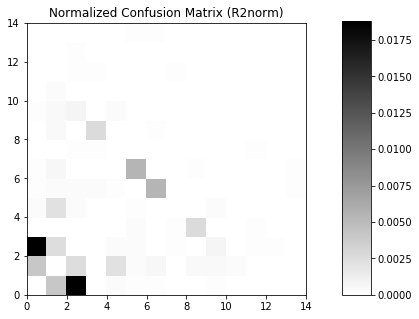

IGRAPH U-W- 14 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.122449
m2: 0.018799
Accuracy: 0.944301
start_iter: 7
R1norm_cutoff: 0.112449
R2norm_cutoff: 0.017799
Accuracy: 0.944301
Round8 ...
Mean CV accuracy: 0.9392
Accuracy on the training set: 0.9944
Accuracy on the hold-out set: 0.9443


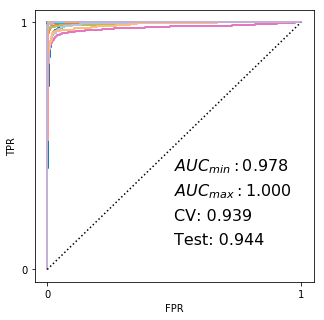

... storing 'L2_Round7_self-projection' as categorical


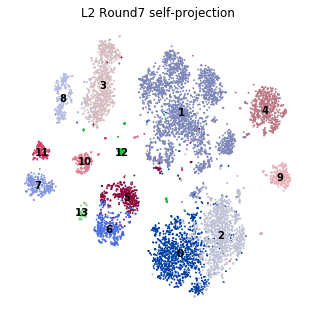

Accuracy on the training set: 0.9960
Accuracy on the hold-out set: 0.9417
Accuracy on the training set: 0.9984
Accuracy on the hold-out set: 0.9433
Max R1mat: 0.140351
Max R2mat: 0.015814


<Figure size 360x360 with 0 Axes>

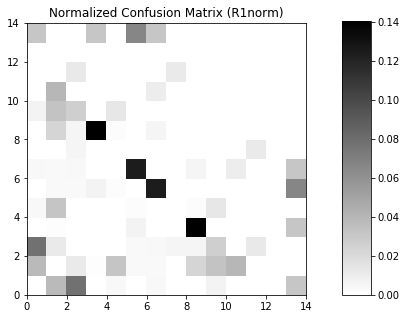

<Figure size 360x360 with 0 Axes>

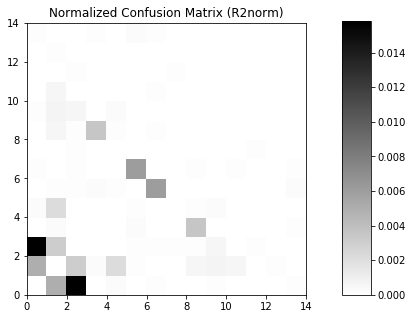

... storing 'L2_Round8' as categorical


IGRAPH U-W- 14 4 --
+ attr: weight (e)
+ edges:
3--8 5--6 5--6 3--8


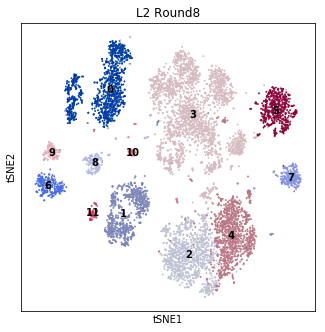

Round9 ...
Mean CV accuracy: 0.9714
Accuracy on the training set: 0.9990
Accuracy on the hold-out set: 0.9591


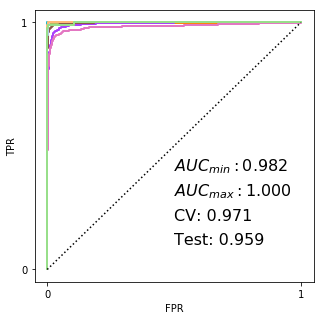

... storing 'L2_Round8_self-projection' as categorical


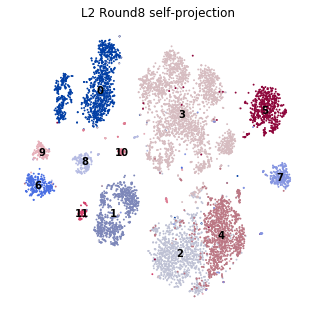

Accuracy on the training set: 0.9981
Accuracy on the hold-out set: 0.9590
Accuracy on the training set: 0.9971
Accuracy on the hold-out set: 0.9564
Max R1mat: 0.070953
Max R2mat: 0.016225


<Figure size 360x360 with 0 Axes>

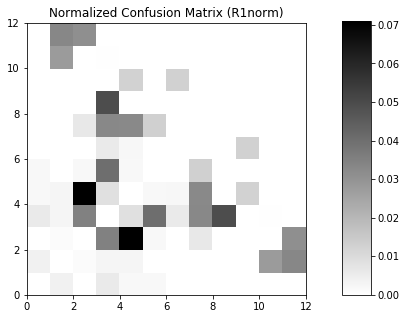

<Figure size 360x360 with 0 Axes>

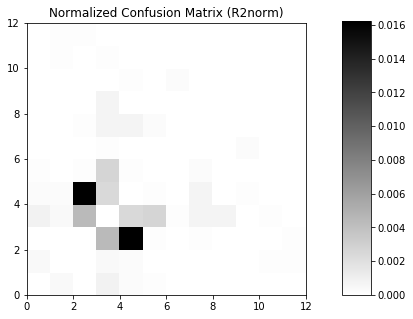

IGRAPH U-W- 12 0 --
+ attr: weight (e)
Converge SCCAF_optimize no cluster!
m1: 0.070953
m2: 0.016225
Accuracy: 0.956351
start_iter: 8
R1norm_cutoff: 0.060953
R2norm_cutoff: 0.015225
Accuracy: 0.956351
Round9 ...
Mean CV accuracy: 0.9667
Accuracy on the training set: 0.9971
Accuracy on the hold-out set: 0.9578


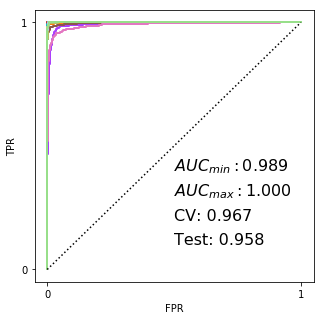

... storing 'L2_Round8_self-projection' as categorical


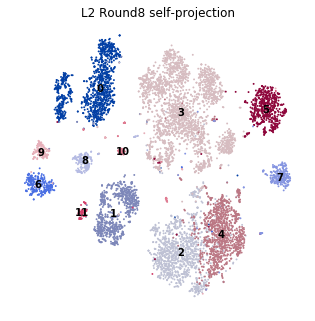

Accuracy on the training set: 0.9962
Accuracy on the hold-out set: 0.9551
Accuracy on the training set: 0.9981
Accuracy on the hold-out set: 0.9587
Max R1mat: 0.093750
Max R2mat: 0.015864


<Figure size 360x360 with 0 Axes>

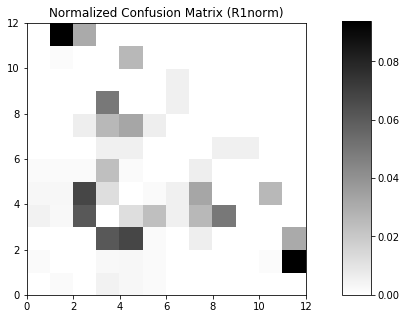

<Figure size 360x360 with 0 Axes>

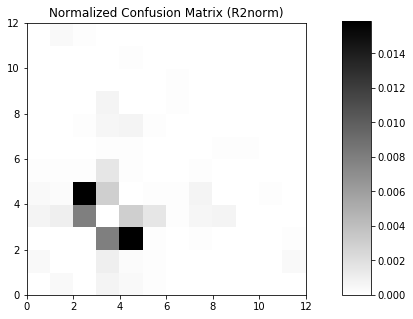

... storing 'L2_Round9' as categorical


IGRAPH U-W- 12 4 --
+ attr: weight (e)
+ edges:
1--11 2--4 2--4 1--11


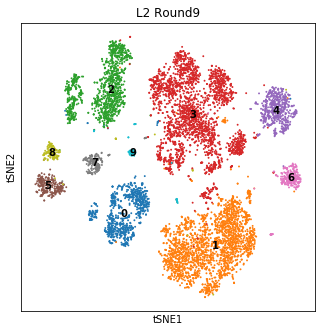

Round10 ...
Mean CV accuracy: 0.9891
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9766


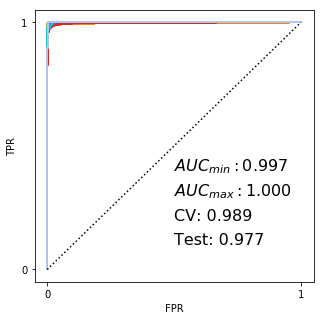

... storing 'L2_Round9_self-projection' as categorical


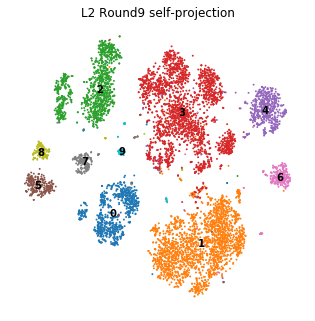

Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9810
Accuracy on the training set: 1.0000
Accuracy on the hold-out set: 0.9812
Max R1mat: 0.036093
Max R2mat: 0.005971
Converge SCCAF_optimize min_acc!
m1: 0.036093
m2: 0.005971
Accuracy: 0.976648


In [23]:
SCCAF_optimize_all(min_acc=0.976, ad=ad, use='pca', basis ='tsne',low_res='louvain_r0.2', prefix='L2')

In [26]:
ad.obs['L2_result'] = \
ad.obs['L2_result'].cat.reorder_categories(['2', '5', '0', '3', '4',\
                                            '1', '8', '7','6','9'])

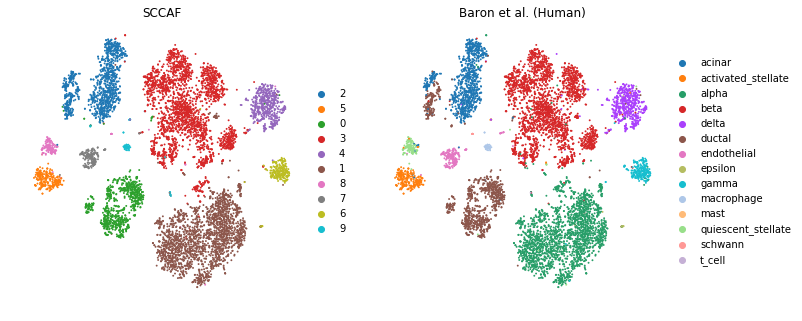

In [27]:
sc.pl.tsne(ad, color=['L2_result','cell',],frameon=False, title=['SCCAF','Baron et al. (Human)'])

# End